In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [7]:
final_df = pd.read_csv("../../Data Cleaning/final_dataset.csv")
final_df.info(), final_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4384 non-null   object 
 1   released          4384 non-null   object 
 2   metacritic        4384 non-null   float64
 3   rating            4384 non-null   float64
 4   ratings_count     4384 non-null   int64  
 5   playtime          4384 non-null   int64  
 6   Platform          4384 non-null   object 
 7   Genre             4384 non-null   object 
 8   Publisher         4384 non-null   object 
 9   NA_Sales(MM)      4384 non-null   float64
 10  EU_Sales(MM)      4384 non-null   float64
 11  JP_Sales(MM)      4384 non-null   float64
 12  Other_Sales(MM)   4384 non-null   float64
 13  Global_Sales(MM)  4384 non-null   float64
 14  price             1255 non-null   float64
 15  Platform_Group    4384 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory 

(None,
 Index(['name', 'released', 'metacritic', 'rating', 'ratings_count', 'playtime',
        'Platform', 'Genre', 'Publisher', 'NA_Sales(MM)', 'EU_Sales(MM)',
        'JP_Sales(MM)', 'Other_Sales(MM)', 'Global_Sales(MM)', 'price',
        'Platform_Group'],
       dtype='object'))

Count: 4384.00
Mean: 5.67
Median: 1.00
Min: 0.00
Max: 239.00
25th Percentile: 0.00
50th Percentile: 1.00
75th Percentile: 5.00
Standard Deviation: 13.95
Skewness: 7.49


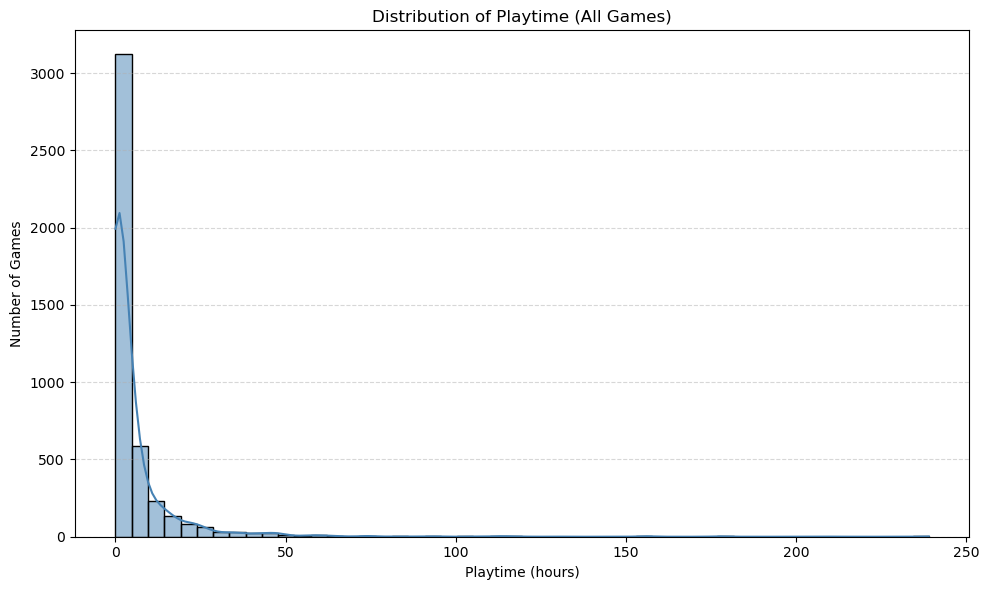

In [10]:
playtime_series = final_df["playtime"].dropna()

playtime_summary = {
    "Count": playtime_series.count(),
    "Mean": playtime_series.mean(),
    "Median": playtime_series.median(),
    "Min": playtime_series.min(),
    "Max": playtime_series.max(),
    "25th Percentile": playtime_series.quantile(0.25),
    "50th Percentile": playtime_series.quantile(0.5),
    "75th Percentile": playtime_series.quantile(0.75),
    "Standard Deviation": playtime_series.std(),
    "Skewness": playtime_series.skew()
}

for key, value in playtime_summary.items():
    print(f"{key}: {value:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(playtime_series, bins=50, kde=True, color="steelblue")
plt.title("Distribution of Playtime (All Games)")
plt.xlabel("Playtime (hours)")
plt.ylabel("Number of Games")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.1.png")
plt.show()


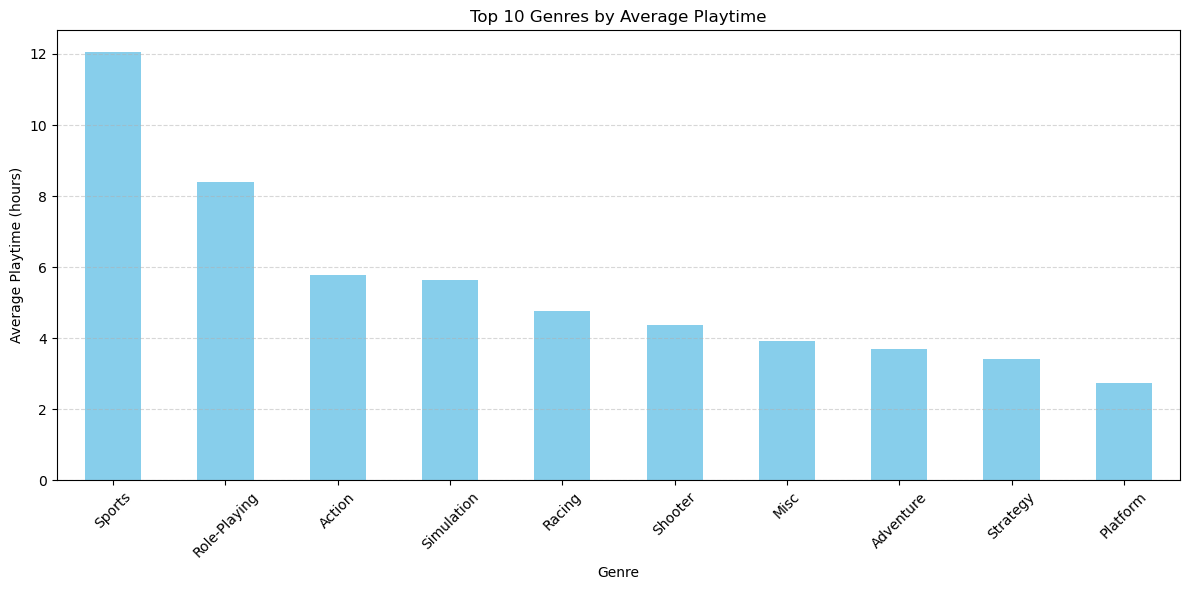

                   mean  median  count
Genre                                 
Sports        12.061856     0.0    388
Role-Playing   8.387164     1.0    483
Action         5.768576     2.0   1292
Simulation     5.628788     1.0    132
Racing         4.764706     1.0    340
Shooter        4.379360     2.0    688
Misc           3.924812     0.0    133
Adventure      3.687500     1.5    192
Strategy       3.405797     1.0    207
Platform       2.745875     0.0    303


In [12]:
genre_playtime = final_df.groupby("Genre")["playtime"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)

top10_genre_playtime = genre_playtime.head(10)

plt.figure(figsize=(12, 6))
top10_genre_playtime["mean"].plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres by Average Playtime")
plt.ylabel("Average Playtime (hours)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.2.png")
plt.show()

print(top10_genre_playtime)


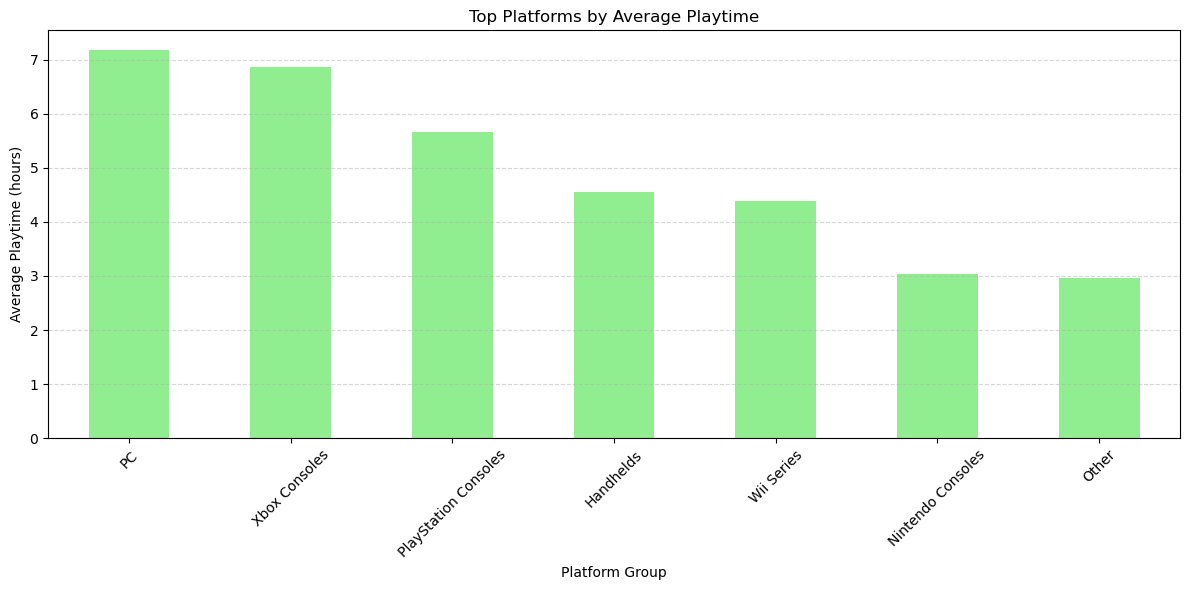

                          mean  median  count
Platform_Group                               
PC                    7.184348     3.0    575
Xbox Consoles         6.858325     2.0    967
PlayStation Consoles  5.667596     1.0   1435
Handhelds             4.546099     0.0    846
Wii Series            4.395425     1.0    306
Nintendo Consoles     3.042918     0.0    233
Other                 2.954545     0.5     22


In [14]:
platform_playtime = final_df.groupby("Platform_Group")["playtime"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)

platform_playtime_top = platform_playtime.head(10)

plt.figure(figsize=(12, 6))
platform_playtime_top["mean"].plot(kind="bar", color="lightgreen")
plt.title("Top Platforms by Average Playtime")
plt.ylabel("Average Playtime (hours)")
plt.xlabel("Platform Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.3.png")
plt.show()

print(platform_playtime_top)


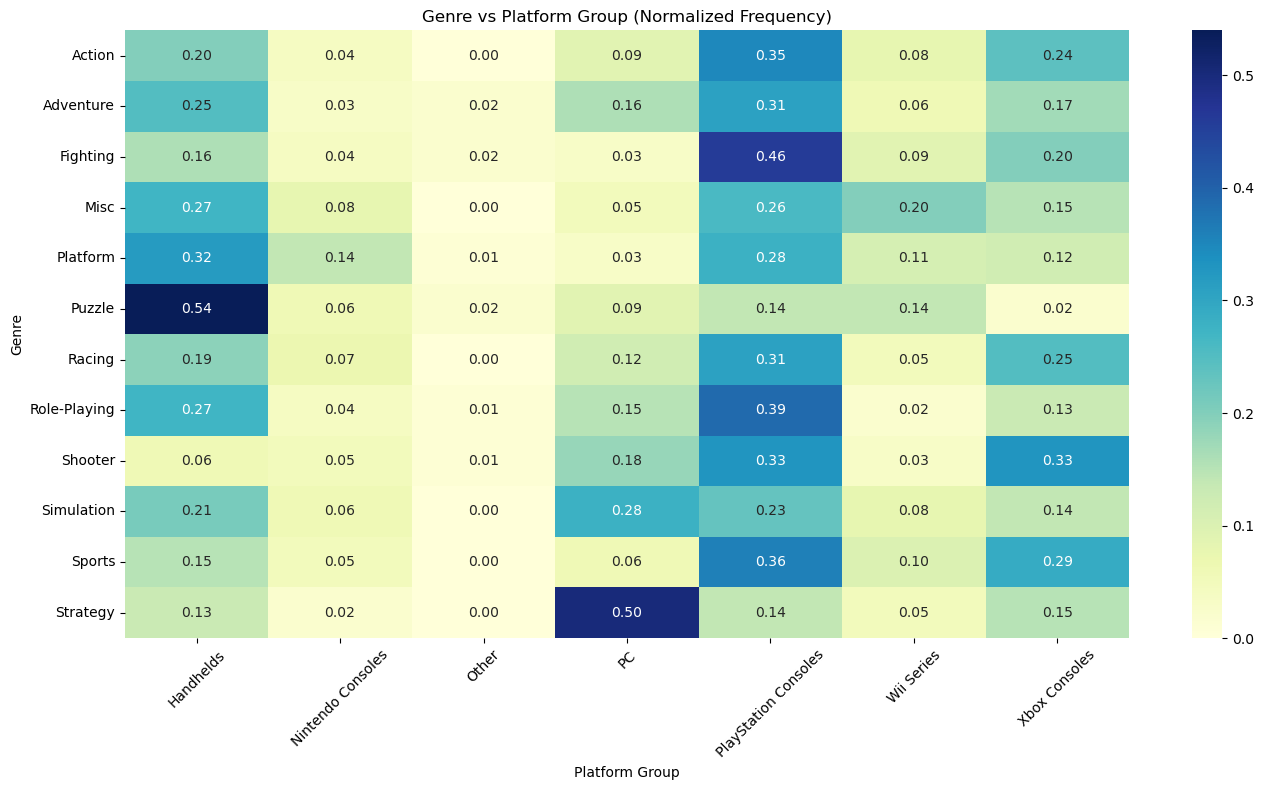

In [16]:
genre_platform_ct = pd.crosstab(final_df["Genre"], final_df["Platform_Group"], normalize='index').round(2)

plt.figure(figsize=(14, 8))
sns.heatmap(genre_platform_ct, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Genre vs Platform Group (Normalized Frequency)")
plt.xlabel("Platform Group")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("viz-1.4.png")
plt.show()


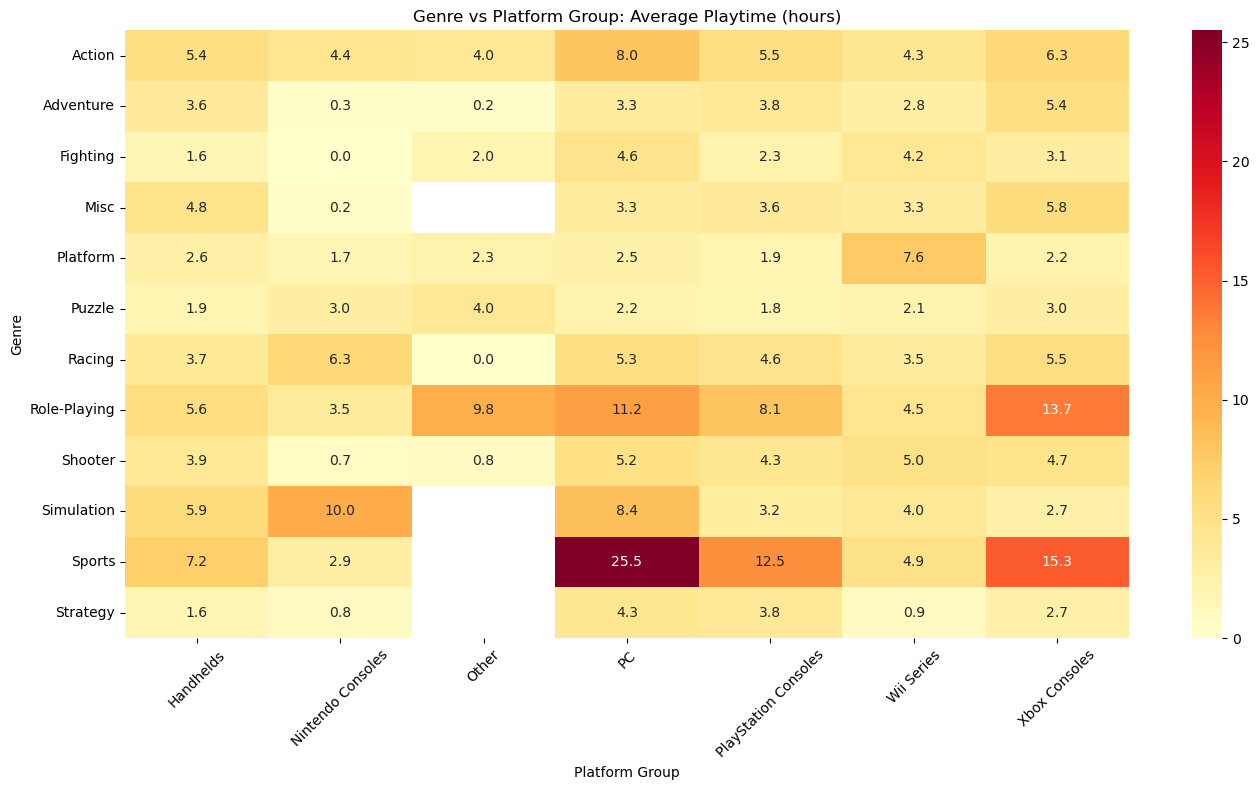

In [18]:
genre_platform_playtime = final_df.pivot_table(
    index="Genre", 
    columns="Platform_Group", 
    values="playtime", 
    aggfunc="mean"
).round(1)

plt.figure(figsize=(14, 8))
sns.heatmap(genre_platform_playtime, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Genre vs Platform Group: Average Playtime (hours)")
plt.xlabel("Platform Group")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("viz-1.5.png")
plt.show()


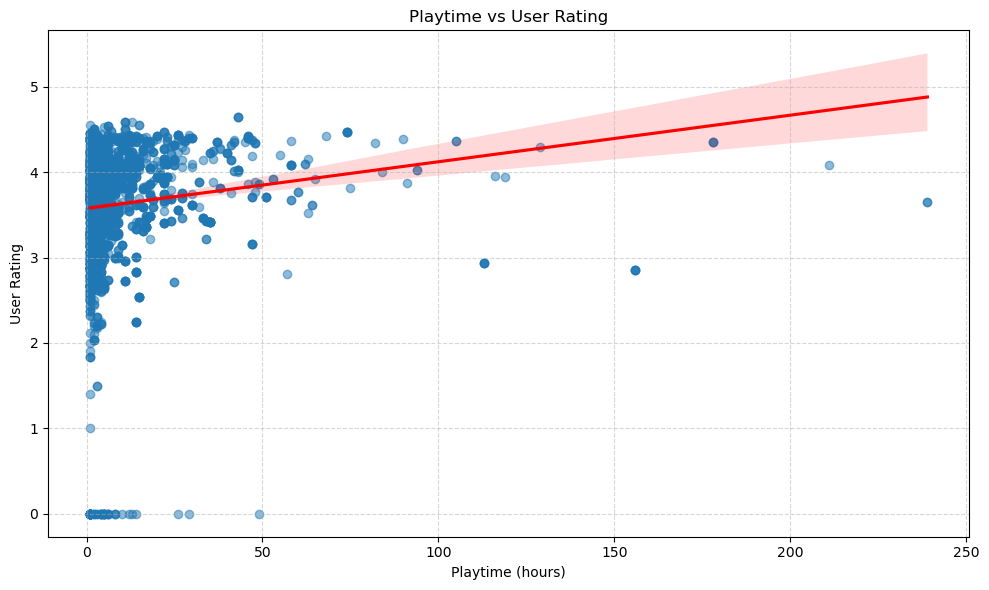

(0.1282857469437892, 3.456143261155138e-11)

In [20]:
df_scatter = final_df[["playtime", "rating"]].dropna()
df_scatter = df_scatter[df_scatter["playtime"] > 0]

plt.figure(figsize=(10, 6))
sns.regplot(data=df_scatter, x="playtime", y="rating", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Playtime vs User Rating")
plt.xlabel("Playtime (hours)")
plt.ylabel("User Rating")
plt.grid(axis="both", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.6.png")
plt.show()

corr_playtime_rating, p_value = pearsonr(df_scatter["playtime"], df_scatter["rating"])

corr_playtime_rating, p_value


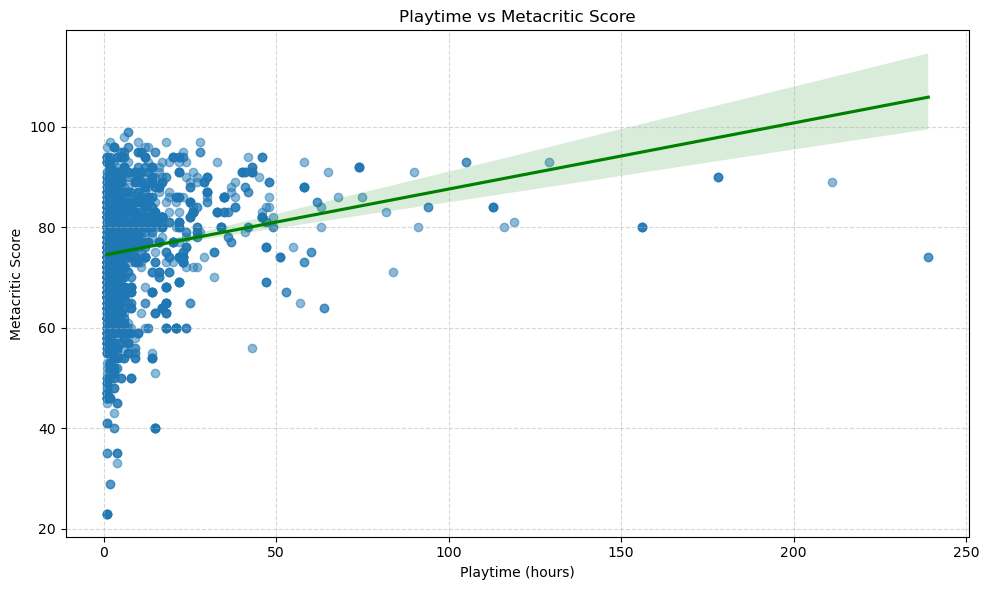

(0.1988987819716672, 4.963292369011497e-25)

In [22]:
df_scatter_meta = final_df[["playtime", "metacritic"]].dropna()
df_scatter_meta = df_scatter_meta[df_scatter_meta["playtime"] > 0]

plt.figure(figsize=(10, 6))
sns.regplot(data=df_scatter_meta, x="playtime", y="metacritic", scatter_kws={"alpha":0.5}, line_kws={"color":"green"})
plt.title("Playtime vs Metacritic Score")
plt.xlabel("Playtime (hours)")
plt.ylabel("Metacritic Score")
plt.grid(axis="both", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.7.png")
plt.show()

corr_playtime_metacritic, p_value_meta = pearsonr(df_scatter_meta["playtime"], df_scatter_meta["metacritic"])

corr_playtime_metacritic, p_value_meta


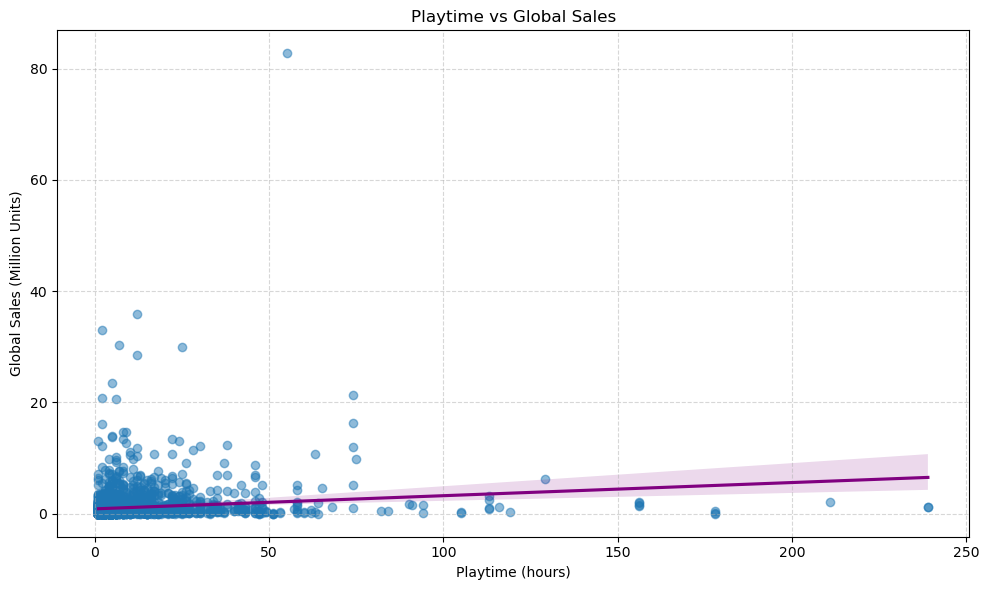

(0.1414757974192502, 2.6019629743154763e-13)

In [24]:
df_scatter_sales = final_df[["playtime", "Global_Sales(MM)"]].dropna()
df_scatter_sales = df_scatter_sales[df_scatter_sales["playtime"] > 0]

plt.figure(figsize=(10, 6))
sns.regplot(data=df_scatter_sales, x="playtime", y="Global_Sales(MM)", scatter_kws={"alpha":0.5}, line_kws={"color":"purple"})
plt.title("Playtime vs Global Sales")
plt.xlabel("Playtime (hours)")
plt.ylabel("Global Sales (Million Units)")
plt.grid(axis="both", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.8.png")
plt.show()

corr_playtime_sales, p_value_sales = pearsonr(df_scatter_sales["playtime"], df_scatter_sales["Global_Sales(MM)"])

corr_playtime_sales, p_value_sales


In [26]:
clustering_data = final_df[["playtime", "rating", "metacritic", "Global_Sales(MM)", "Platform_Group", "Genre"]].dropna()

features_scaled = StandardScaler().fit_transform(clustering_data[["playtime", "rating", "metacritic", "Global_Sales(MM)"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clustering_data["cluster"] = kmeans.fit_predict(features_scaled)

playtime_means = clustering_data.groupby("cluster")["playtime"].mean().sort_values()
new_cluster_order = {old: new for new, old in enumerate(playtime_means.index)}
clustering_data["session_cluster"] = clustering_data["cluster"].map(new_cluster_order)

cluster_name_map = {
    0: "Short Session",
    1: "Medium Session",
    2: "Long Session"
}
clustering_data["session_label"] = clustering_data["session_cluster"].map(cluster_name_map)

final_summary = clustering_data.groupby("session_label")[["playtime", "rating", "metacritic", "Global_Sales(MM)"]].mean().round(2)
final_summary["Game Count"] = clustering_data["session_label"].value_counts().reindex(final_summary.index)

print("▶ Cluster rearrangement results:")
print(final_summary)


▶ Cluster rearrangement results:
                playtime  rating  metacritic  Global_Sales(MM)  Game Count
session_label                                                             
Long Session       41.61    4.03       84.96              5.48         253
Medium Session      4.18    3.76       75.92              0.78        3234
Short Session       0.89    0.85       58.79              0.29         897


In [28]:
genre_dist = (
    clustering_data.groupby("session_label")["Genre"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .round(2)
)

platform_dist = (
    clustering_data.groupby("session_label")["Platform_Group"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .round(2)
)

print("▶ Percentage of genre distribution by cluster:")
display(genre_dist)

print("\n▶ Percentage distribution of platform groups by cluster:")
display(platform_dist)


▶ Percentage of genre distribution by cluster:


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
session_label,,,,,,,,,,,,
Long Session,0.21,0.01,0.00,0.04,0.06,0.00,0.08,0.23,0.12,0.03,0.20,0.02
Medium Session,0.31,0.04,0.03,0.03,0.07,0.01,0.08,0.10,0.17,0.03,0.08,0.05
Short Session,0.27,0.06,0.05,0.04,0.06,0.02,0.07,0.13,0.13,0.03,0.10,0.04



▶ Percentage distribution of platform groups by cluster:


Platform_Group,Handhelds,Nintendo Consoles,Other,PC,PlayStation Consoles,Wii Series,Xbox Consoles
session_label,,,,,,,
Long Session,0.15,0.04,0.00,0.09,0.38,0.07,0.26
Medium Session,0.17,0.05,0.01,0.15,0.32,0.07,0.23
Short Session,0.28,0.06,0.00,0.06,0.33,0.08,0.18


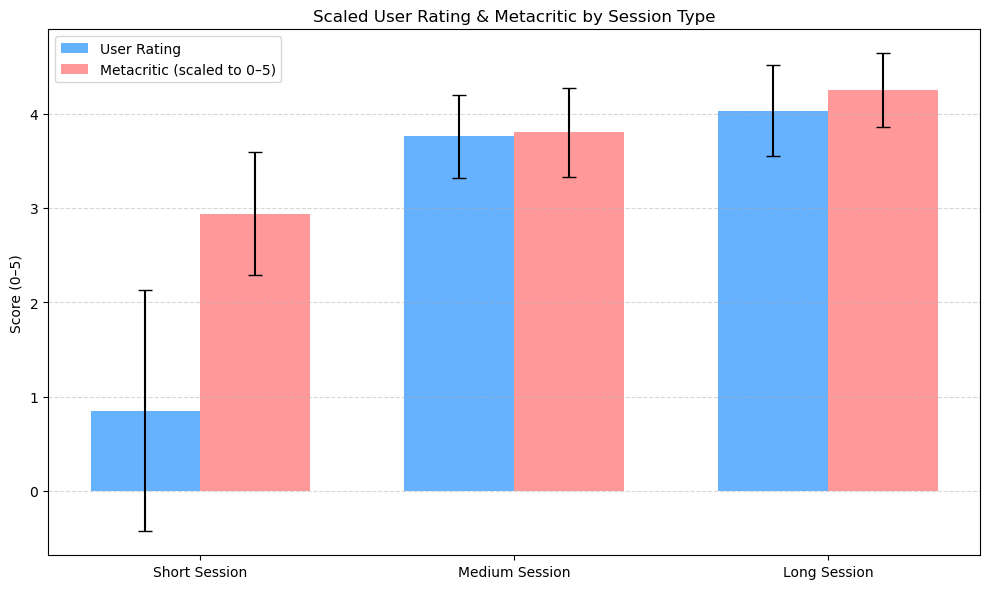

In [30]:
clustering_data["metacritic_scaled"] = clustering_data["metacritic"] / 20

session_order = ["Short Session", "Medium Session", "Long Session"]

mean_std_scaled = (
    clustering_data.groupby("session_label")[["rating", "metacritic_scaled"]]
    .agg(["mean", "std"])
    .reindex(session_order)
    .round(2)
)

x = session_order
rating_means = mean_std_scaled["rating"]["mean"]
rating_stds = mean_std_scaled["rating"]["std"]
meta_means = mean_std_scaled["metacritic_scaled"]["mean"]
meta_stds = mean_std_scaled["metacritic_scaled"]["std"]

bar_width = 0.35
indices = np.arange(len(x))

plt.figure(figsize=(10, 6))
plt.bar(indices, rating_means, yerr=rating_stds, capsize=5, label="User Rating", width=bar_width, color="#66B2FF")
plt.bar(indices + bar_width, meta_means, yerr=meta_stds, capsize=5, label="Metacritic (scaled to 0–5)", width=bar_width, color="#FF9999")

plt.xticks(indices + bar_width / 2, x)
plt.ylabel("Score (0–5)")
plt.title("Scaled User Rating & Metacritic by Session Type")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.9.png")
plt.show()


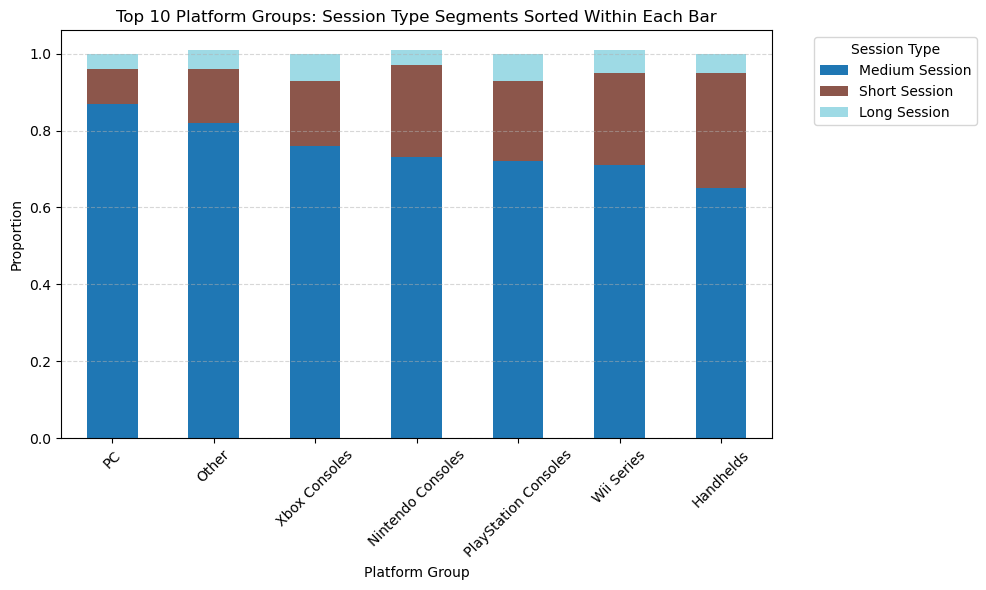

In [32]:
platform_dist = (
    clustering_data.groupby("Platform_Group")["session_label"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .round(2)
)

dominant_order = platform_dist.idxmax(axis=1).to_frame(name="Dominant Session")
dominant_order["Max Proportion"] = platform_dist.max(axis=1)

top_platforms = dominant_order.sort_values("Max Proportion", ascending=False).head(10).index
platform_dist_top = platform_dist.loc[top_platforms]

platform_dist_sorted = pd.DataFrame(index=[], columns=top_platforms)

for platform in top_platforms:
    sorted_session = platform_dist_top.loc[platform].sort_values(ascending=False)
    platform_dist_sorted[platform] = sorted_session.values
    platform_dist_sorted.index = sorted_session.index

platform_dist_sorted.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")
plt.title("Top 10 Platform Groups: Session Type Segments Sorted Within Each Bar")
plt.xlabel("Platform Group")
plt.ylabel("Proportion")
plt.legend(title="Session Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.10.png")
plt.show()


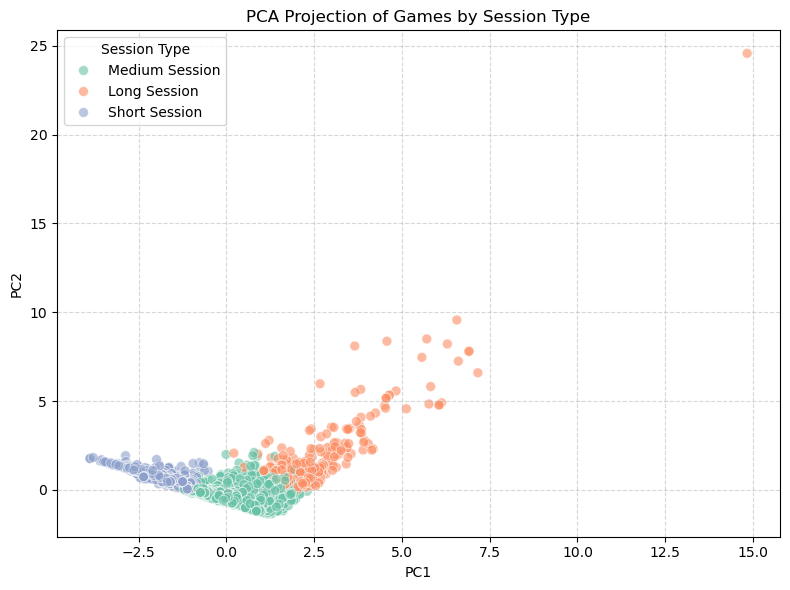

In [34]:
features = ["playtime", "rating", "metacritic", "Global_Sales(MM)"]
pca_data = clustering_data[features].dropna()

pca_labels = clustering_data.loc[pca_data.index, "session_label"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["Session Type"] = pca_labels.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Session Type", palette="Set2", alpha=0.6, s=50)
plt.title("PCA Projection of Games by Session Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


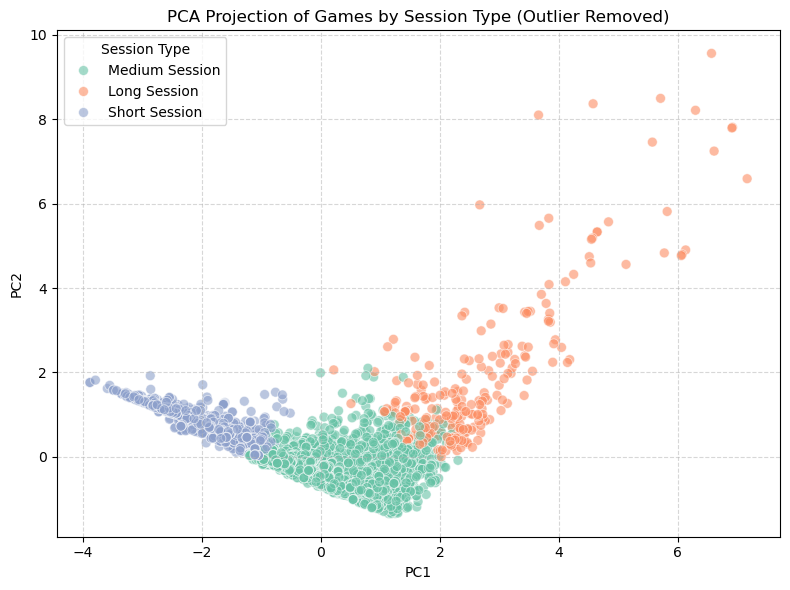

In [36]:
pca_df_clean = pca_df[(pca_df["PC1"] <= 10) & (pca_df["PC2"] <= 15)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_clean, x="PC1", y="PC2", hue="Session Type", palette="Set2", alpha=0.6, s=50)
plt.title("PCA Projection of Games by Session Type (Outlier Removed)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("viz-1.11.png")
plt.show()
